In [46]:
import numpy as np   
import pandas as pd 
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler   
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN

In [47]:
df=pd.read_csv("US_Heart_Patients_2.csv");

In [48]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,...,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,...,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,...,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,...,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,...,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,...,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,...,22.00,84.0,86.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,...,19.16,86.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,...,21.47,80.0,107.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,...,25.60,67.0,72.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df=df.loc[:,~(df.columns.str.startswith("Unnamed"))];

In [50]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [52]:
df.isnull().count()

Gender             4240
age                4240
education          4240
currentSmoker      4240
cigsPerDay         4240
BP Meds            4240
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
tot cholesterol    4240
Systolic BP        4240
Diastolic BP       4240
BMI                4240
heartRate          4240
glucose            4240
Heart-Att          4240
dtype: int64

In [53]:
df.shape[0]

4240

In [54]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [55]:
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,50.0,9.0,32.0,42.0,49.0,56.0,70.0
education,4130.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0
currentSmoker,4237.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
cigsPerDay,4209.0,9.0,12.0,0.0,0.0,0.0,20.0,70.0
BP Meds,4180.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
prevalentStroke,4231.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
prevalentHyp,4238.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
diabetes,4238.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
tot cholesterol,4180.0,237.0,45.0,107.0,206.0,234.0,263.0,696.0
Systolic BP,4236.0,132.0,22.0,84.0,117.0,128.0,144.0,295.0


In [56]:
col=df.columns

In [57]:
col

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [58]:
cat=['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart-Att']
num=['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']

#### NULL value treatment

In [59]:
for i in cat:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [60]:
df.isnull().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BP Meds              0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [61]:
for i in num:
    df[i].fillna(df[i].median(),inplace=True)

In [62]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [63]:
df[num]

,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,78.0
4237,52.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0
4238,40.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0


In [64]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [65]:
df[cat]

,Gender,education,currentSmoker,BP Meds,prevalentStroke,prevalentHyp,diabetes,Heart-Att
0,Male,4.0,0.0,0.0,0.0,0.0,0.0,0
1,Female,2.0,0.0,0.0,0.0,0.0,0.0,0
2,Male,1.0,1.0,0.0,0.0,0.0,0.0,0
3,Female,3.0,1.0,0.0,0.0,1.0,0.0,1
4,Female,3.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
4235,Female,2.0,1.0,0.0,0.0,0.0,0.0,0
4236,Female,1.0,1.0,0.0,0.0,0.0,0.0,0
4237,Female,2.0,0.0,0.0,0.0,0.0,0.0,0
4238,Male,3.0,0.0,0.0,0.0,1.0,0.0,0


In [68]:
# for i in df['Gender']:
#     if(df['Gender'][i]=="Male") df['Gender'][i]=0
#     else df['Gender'][i]=1

SyntaxError: invalid syntax (2620279951.py, line 2)

In [69]:
df['Gender'].replace(["Male","Female"],value=[0,1],inplace=True)

In [70]:
df['Gender']

0       0
1       1
2       0
3       1
4       1
       ..
4235    1
4236    1
4237    1
4238    0
4239    1
Name: Gender, Length: 4240, dtype: int64

In [71]:
df.corr()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
Gender,1.000000,0.029175,-0.014390,-0.196498,-0.313845,0.051385,0.004478,-0.006936,-0.015850,0.069258,0.034861,-0.059731,-0.082745,0.116241,-0.010821,-0.088789
age,0.029175,1.000000,-0.164593,-0.212611,-0.191279,0.121064,0.057703,0.305875,0.101361,0.260522,0.394080,0.205334,0.134302,-0.011342,0.117108,0.225981
education,-0.014390,-0.164593,1.000000,0.019137,0.010832,-0.010109,-0.032854,-0.077630,-0.038099,-0.022823,-0.125262,-0.061862,-0.138531,-0.051145,-0.034742,-0.052703
currentSmoker,-0.196498,-0.212611,0.019137,1.000000,0.759379,-0.048266,-0.032944,-0.103932,-0.044209,-0.046378,-0.130666,-0.108536,-0.165985,0.061267,-0.054666,0.018334
cigsPerDay,-0.313845,-0.191279,0.010832,0.759379,1.000000,-0.044588,-0.032203,-0.066007,-0.036069,-0.026874,-0.088819,-0.057214,-0.092723,0.072906,-0.056206,0.059038
BP Meds,0.051385,0.121064,-0.010109,-0.048266,-0.044588,1.000000,0.114614,0.258722,0.051407,0.078297,0.251497,0.192256,0.099887,0.015348,0.049255,0.086448
prevalentStroke,0.004478,0.057703,-0.032854,-0.032944,-0.032203,0.114614,1.000000,0.074846,0.006955,0.000210,0.056998,0.045145,0.024362,-0.017641,0.018780,0.061823
prevalentHyp,-0.006936,0.305875,-0.077630,-0.103932,-0.066007,0.258722,0.074846,1.000000,0.077851,0.163258,0.695866,0.614872,0.300216,0.147422,0.083091,0.176290
diabetes,-0.015850,0.101361,-0.038099,-0.044209,-0.036069,0.051407,0.006955,0.077851,1.000000,0.039239,0.112205,0.050982,0.086297,0.049271,0.606722,0.097344
tot cholesterol,0.069258,0.260522,-0.022823,-0.046378,-0.026874,0.078297,0.000210,0.163258,0.039239,1.000000,0.207234,0.162610,0.114801,0.090748,0.045698,0.081745


<Axes: >

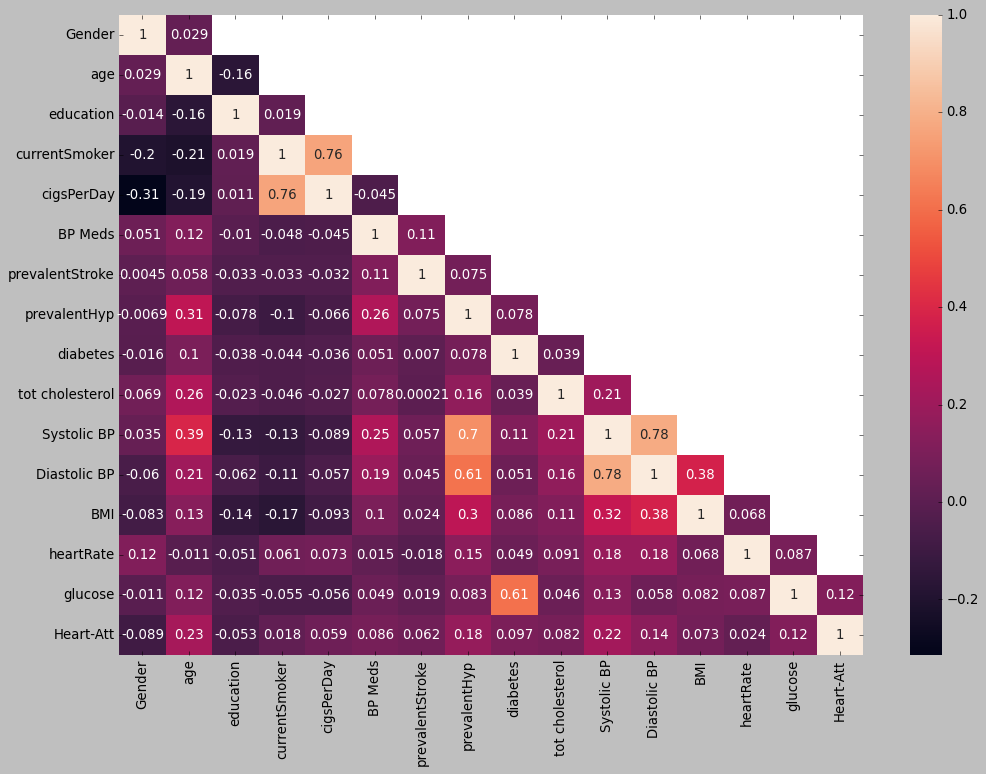

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr(),+2))

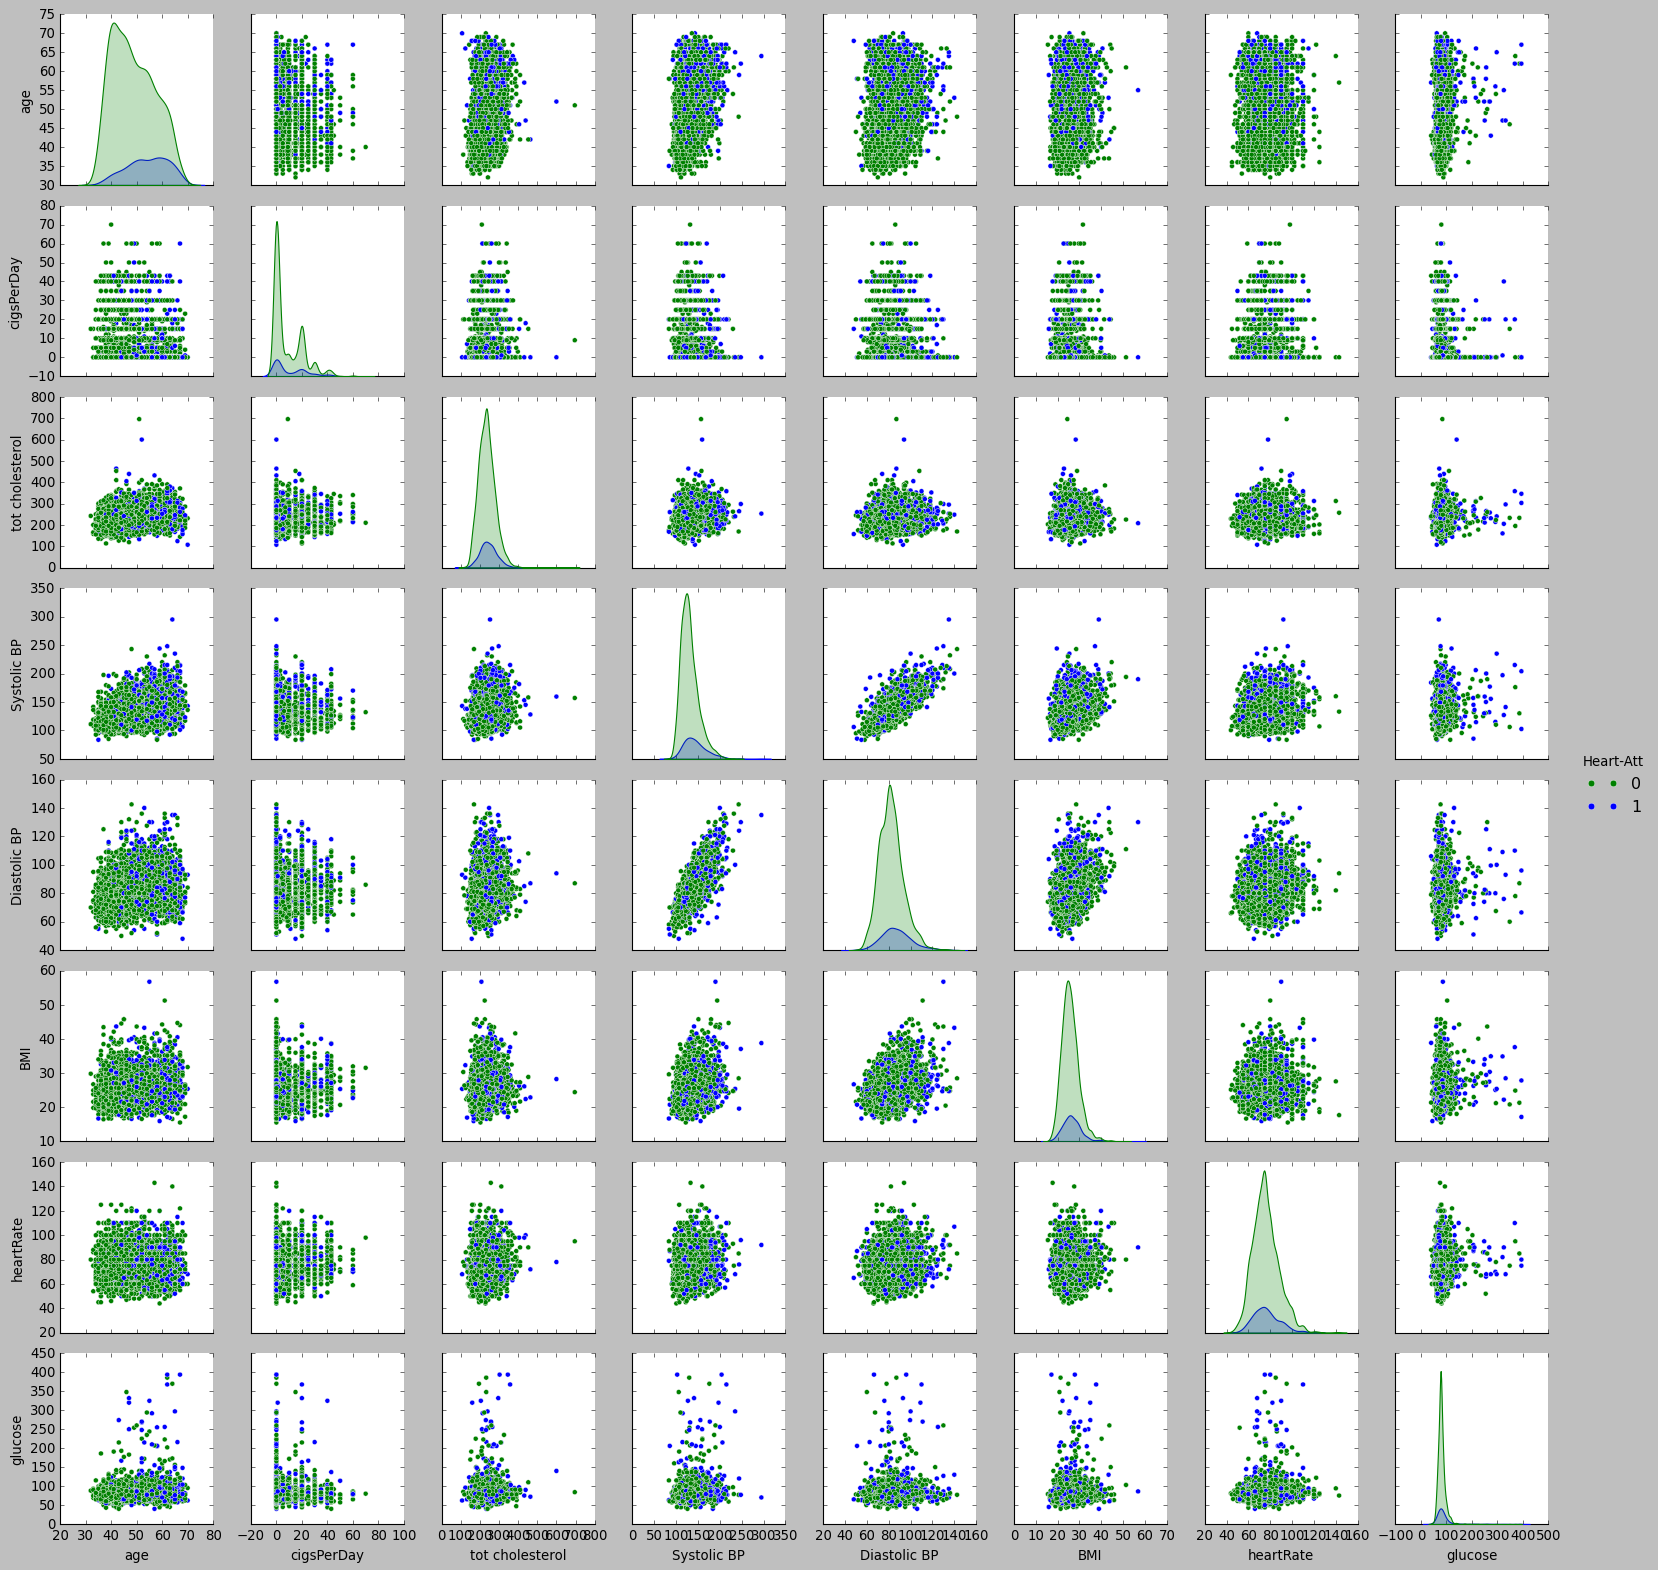

In [77]:
sns.pairplot(df[num+["Heart-Att"]],hue="Heart-Att",palette=["green","blue"])